In [194]:
# Importar base de datos
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:/Users/Rubén/Documents/DATA ANALIST/git/TareasEBACmx/Practica m44')
df = pd.read_csv('general_data_.csv')

In [195]:
df.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3307,45,No,Travel_Rarely,Research & Development,1,5,Technical Degree,1,3308,Male,...,4.0,Y,15,8,3,18.0,2,5,0,2
732,33,No,Travel_Frequently,Research & Development,2,3,Medical,1,733,Female,...,6.0,Y,17,8,0,8.0,2,5,1,2
67,31,No,Travel_Frequently,Research & Development,2,1,Life Sciences,1,68,Female,...,1.0,Y,17,8,0,10.0,5,10,8,9


In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [197]:
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [198]:
df = df.drop(['EmployeeCount'], axis=1)
df = df.drop(['StandardHours'], axis=1)
df = df.drop(['Over18'], axis=1)
df = df.drop(['EmployeeID'], axis=1)

In [199]:
# Validar cuantas celdas en total son nulas
print(f'Existen {df.isnull().sum().sum()} celdas nulas en el DataFrame')

Existen 28 celdas nulas en el DataFrame


In [200]:
# Validar qué columnas tienen valores nulos
missing_values = df.isnull().sum()
print('Columnas que tienen valores nulos:')
print('-------------------------------')
missing_values = missing_values[missing_values > 0]
print(missing_values)

Columnas que tienen valores nulos:
-------------------------------
NumCompaniesWorked    19
TotalWorkingYears      9
dtype: int64


Imputacion de Datos

In [201]:
# Promediar datos generales para rellenar valores nulos
num_companies_worked_mean = int(df['NumCompaniesWorked'].mean())
total_working_years_mean = int(df['TotalWorkingYears'].mean())

# Imputacion de Datos
df['NumCompaniesWorked']=df['NumCompaniesWorked'].fillna(num_companies_worked_mean)
df['TotalWorkingYears']=df['TotalWorkingYears'].fillna(total_working_years_mean)

In [202]:
# Validar qué columnas tienen valores nulos
missing_values = df.isnull().sum()
print('Columnas que tienen valores nulos:')
print('-------------------------------')
missing_values = missing_values[missing_values > 0]
print(missing_values)

Columnas que tienen valores nulos:
-------------------------------
Series([], dtype: int64)


In [203]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr().style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '10pt'})

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.298869,-0.033137,-0.031753,0.680405,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.013514,0.038125,0.011169,0.009351,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016195,-0.040531,0.001261,-0.010734,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.010116,0.010973,0.000993,-0.036901,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.020515,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.298869,-0.013514,-0.016195,-0.010116,-0.020515,1.000000,0.031062,0.017282,0.238358,-0.032225,-0.117490,-0.036326,-0.109207
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.031062,1.000000,0.012548,-0.018738,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017282,0.012548,1.000000,0.002704,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.680405,0.009351,-0.010734,-0.036901,-0.033758,0.238358,-0.018738,0.002704,1.000000,-0.040735,0.626848,0.404001,0.458422
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032225,-0.037392,-0.069902,-0.040735,1.000000,-0.007894,0.016121,-0.013270


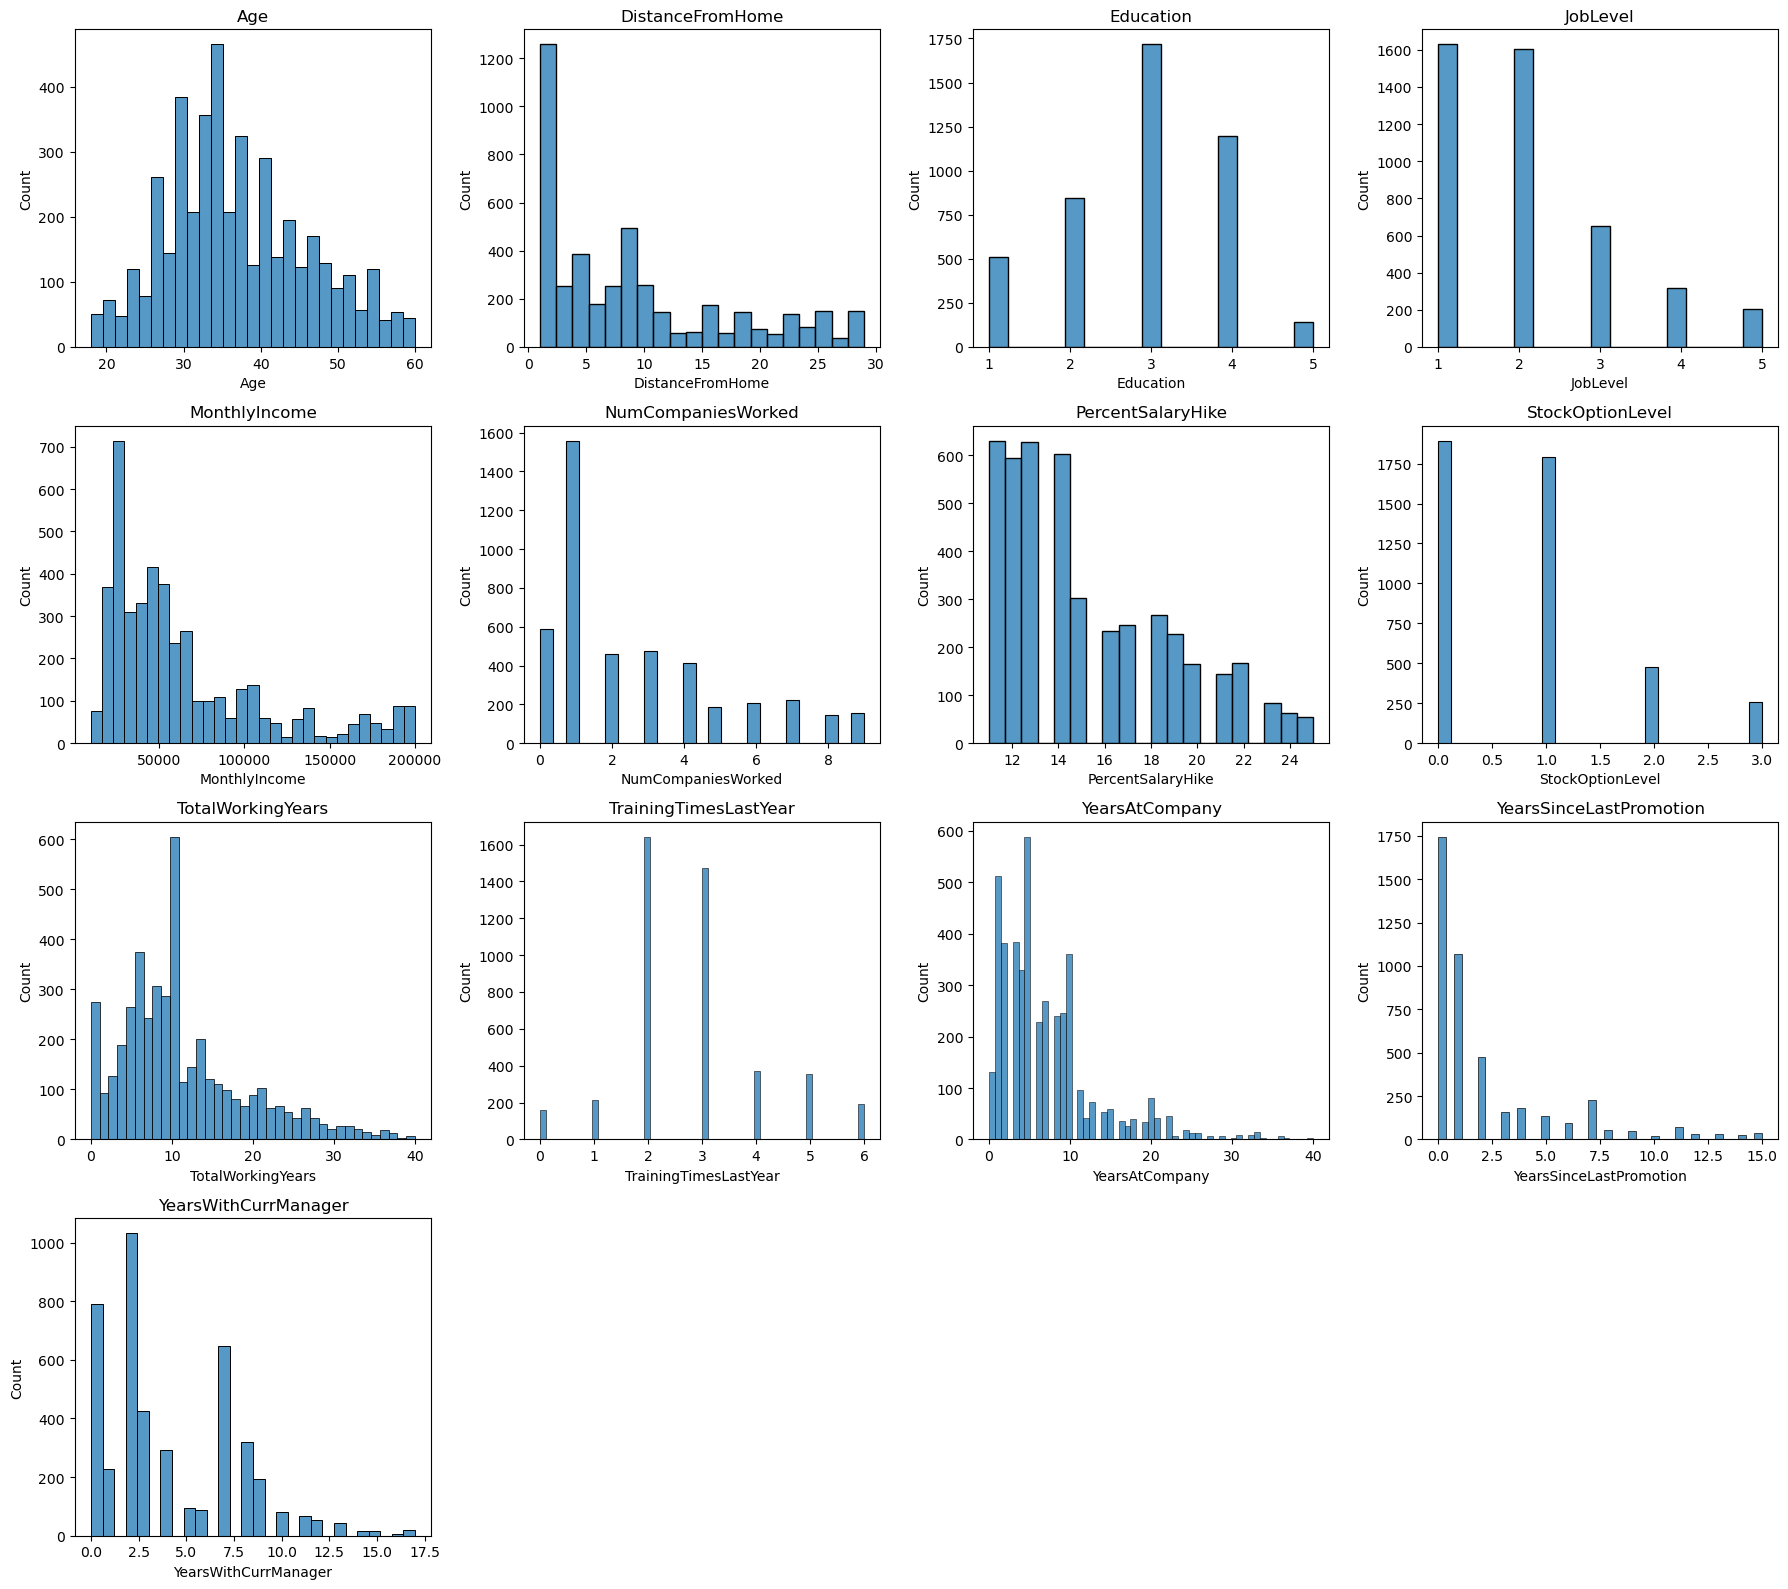

In [204]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, col in enumerate(numeric_df.columns):
    ax = axes[i//4, i%4]
    sns.histplot(numeric_df[col], ax=ax, kde=False)
    ax.set_title(col)

total_plots = axes.size
for j in range(i+1, total_plots):
    axes.flat[j].set_visible(False)

plt.tight_layout()

In [205]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(0).astype(np.int64)

In [206]:
# Balanceo de clases
print(df['EducationField'].value_counts())
print('----------------------------- ')
print(df['BusinessTravel'].value_counts())
print('----------------------------- ')
print(df['Department'].value_counts())

EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64
----------------------------- 
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
----------------------------- 
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64


In [207]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0,14,1,10.0,2,9,7,8


In [208]:
cats = ['Gender', 'EducationField', 'BusinessTravel', 'Department', 'MaritalStatus', 'JobRole','Attrition']

for i in cats:
    df[i] = df[i].astype('category').cat.codes


In [209]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,0,1,6,2,60290,3,17,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,1,2,0,26790,2,15,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,2,7,1,37020,0,20,0,5.0,4,4,1,2
4408,42,0,2,2,18,2,3,1,1,2,0,23980,0,14,1,10.0,2,9,7,8


In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['MonthlyIncome_Scale'] = scaler.fit_transform(df[['MonthlyIncome']])

In [211]:
df.drop('MonthlyIncome',axis=1,inplace=True)

## Data Split

In [212]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition',axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)

In [213]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_Scale
0,51,2,2,6,2,1,0,1,0,1,1,11,0,1.0,6,1,0,0,1.405136
1,31,1,1,10,1,1,0,1,6,2,0,23,1,6.0,3,5,1,4,-0.491661
2,32,1,1,17,4,4,1,4,7,1,1,15,3,5.0,2,5,0,3,2.725053
3,38,0,1,2,5,1,1,3,1,1,3,11,3,13.0,5,8,7,5,0.386301
4,32,2,1,10,1,3,1,1,7,2,4,12,2,9.0,2,6,0,4,-0.884109


In [214]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int8

## Regresion Logistica

In [215]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [216]:
y_predict[0:200]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1], dtype=int8)

In [217]:
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X.columns

coef_df['Intercept'] = model.intercept_
coef_df.T

,0
Age,-0.026643
BusinessTravel,0.018677
Department,-0.284431
DistanceFromHome,0.001540
Education,-0.040470
EducationField,-0.079894
Gender,0.124804
JobLevel,-0.073885
JobRole,0.052852
MaritalStatus,0.624626


## Matriz

Text(0.5, 1.0, 'Matriz de Confusión')

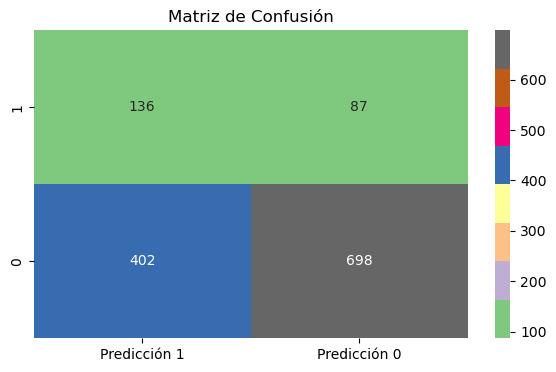

In [218]:
# Genera la matriz de confusión
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, 
                     index=[i for i in ["1", "0"]],
                     columns=[i for i in ["Predicción 1", "Predicción 0"]])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True, cmap='Accent', fmt='d').set_title("Matriz de Confusión")


In [219]:
# Medidas del Modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Medidas del Modelo")
print("------------------")
print("Accuracy = {:.2f}".format(model_score))
print("Precision = {:.2f}".format(precision_score))
print("Recall = {:.2f}".format(recall_score))
print("F1 Score = {:.2f}".format(f1_score))
print("Roc Auc Score = {:.2f}".format(roc_auc_score(y_test, y_pred)))


Medidas del Modelo
------------------
Accuracy = 0.63
Precision = 0.25
Recall = 0.61
F1 Score = 0.36
Roc Auc Score = 0.62


In [223]:
# Modelo sin 'Balancear'
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [224]:
# Medidas del Modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Medidas del Modelo")
print("------------------")
print("Accuracy = {:.2f}".format(model_score))
print("Precision = {:.2f}".format(precision_score))
print("Recall = {:.2f}".format(recall_score))
print("F1 Score = {:.2f}".format(f1_score))
print("Roc Auc Score = {:.2f}".format(roc_auc_score(y_test, y_pred)))


Medidas del Modelo
------------------
Accuracy = 0.84
Precision = 0.82
Recall = 0.06
F1 Score = 0.12
Roc Auc Score = 0.53
